# Bayesian Linear Regression Modeling
## Module Development for BisQue
***



## Why Bayesian Regression?

- _Priors_: We can quantify any prior knowledge we might have by placing priors on the parameters. For example, if we think that $\sigma$ is likely to be small we would choose a prior with more probability mass on low values.

- _Quantifying uncertainty_:  We do not get a single estimate of $\beta$ as above but instead a complete posterior distribution about how likely different values of $\beta$ are. For example, with few data points our uncertainty in $\beta$ will be very high and we’d be getting very wide posteriors.

\begin{align}
y = \beta_0 + \beta_1 + \epsilon
\end{align}

In [17]:
%matplotlib inline
import pymc3 as pm
from pymc3 import  *
import scipy.io as sio
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.rcParams['figure.dpi']=500
plt.style.use('/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/amil.mplstyle')

Only 150 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 5 jobs)
NUTS: [sd_log__, x, Intercept]
100%|██████████| 2650/2650 [00:03<00:00, 677.61it/s]


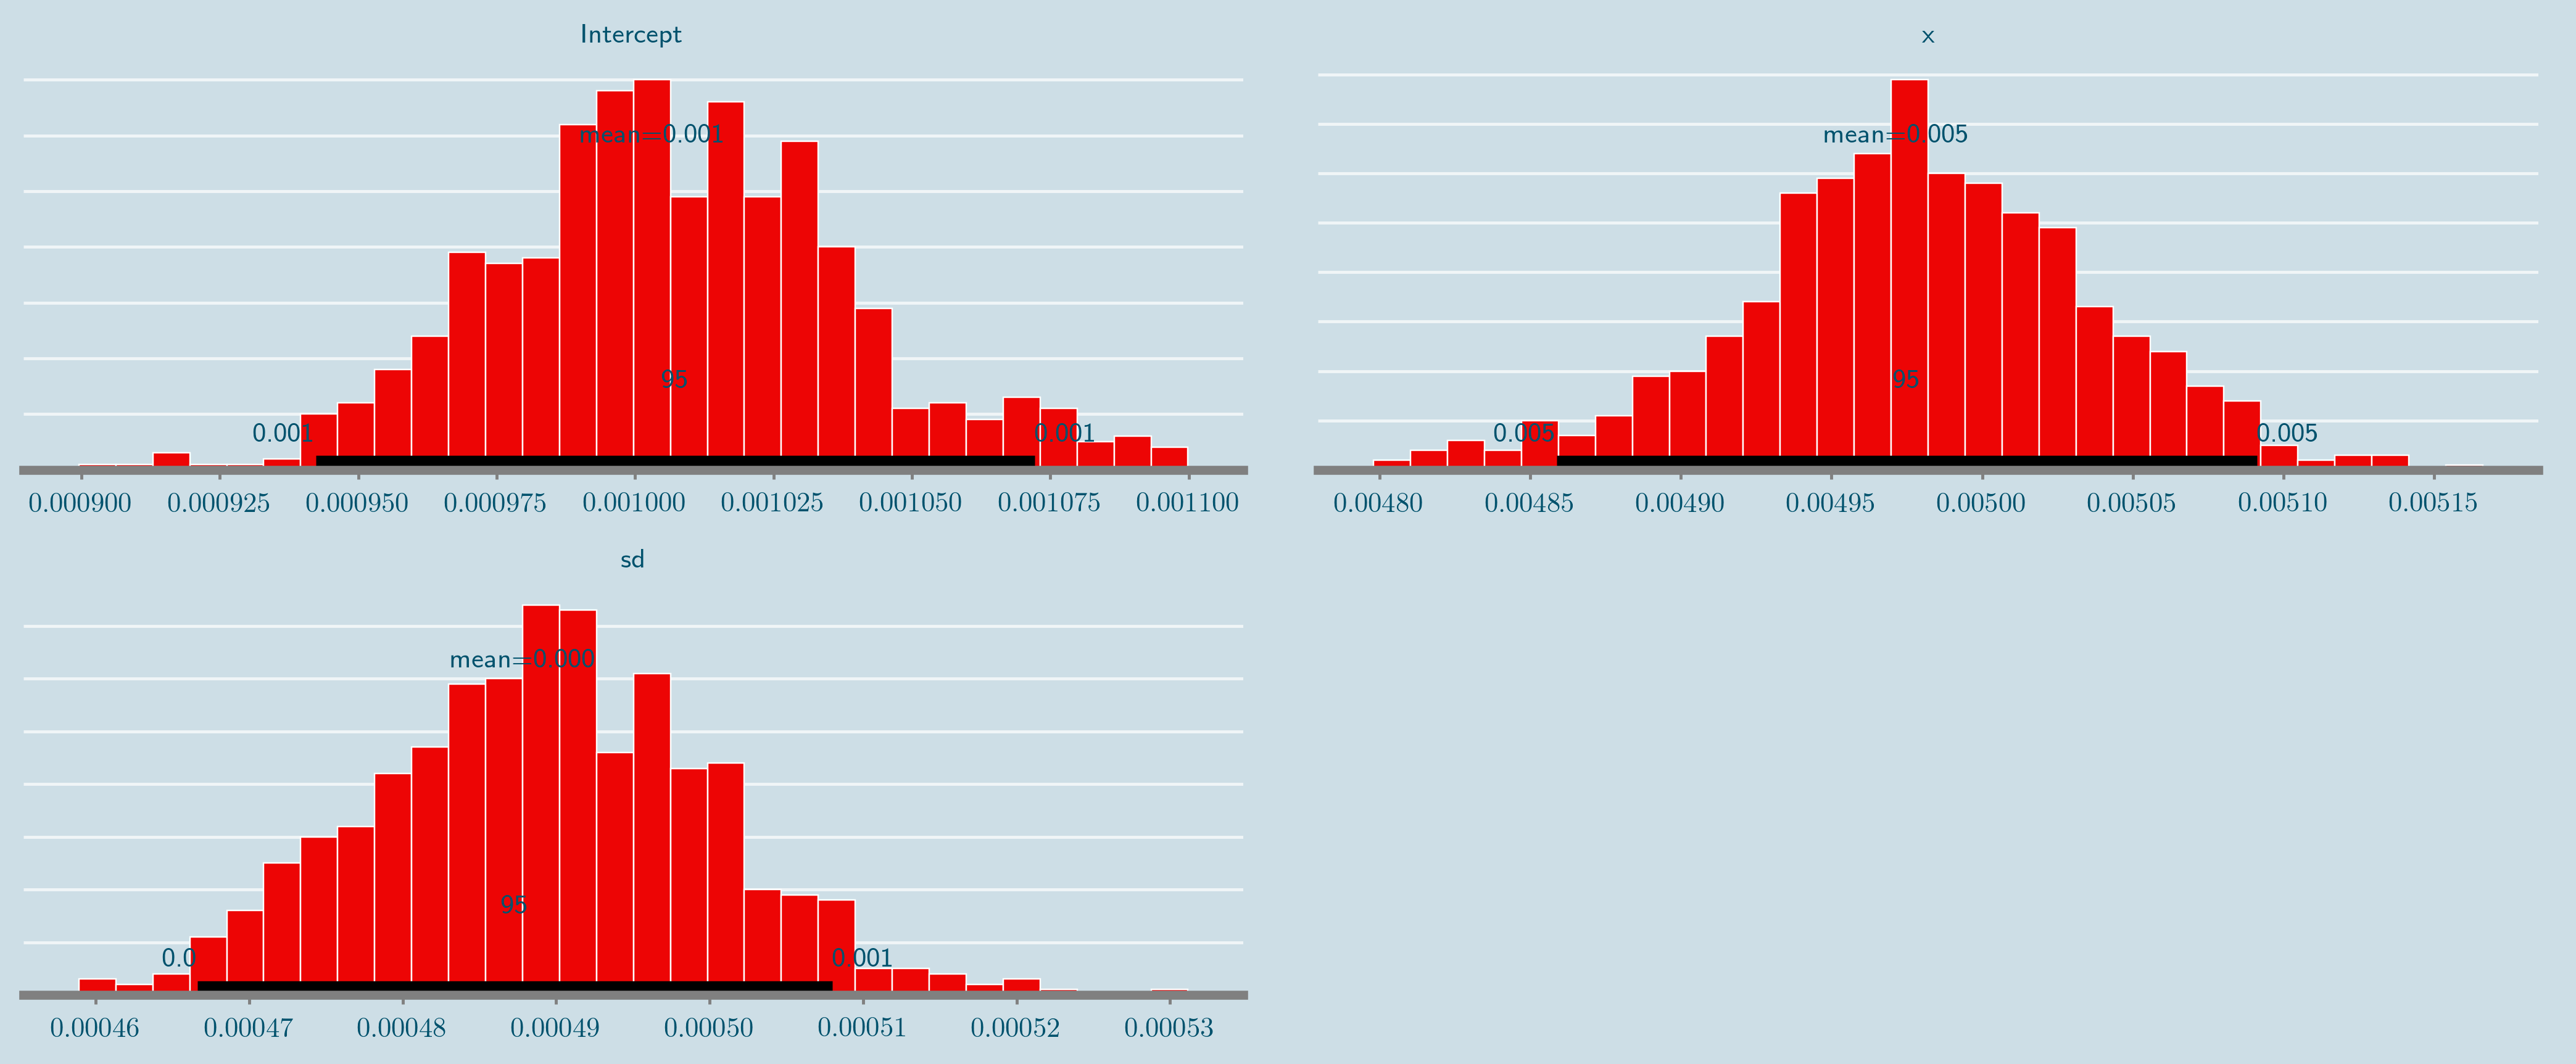

In [111]:
b0 = 0.001
b1 = 0.005
X = np.random.rand(1000)
eps = b1*np.random.normal(0, 0.1, 1000)
y = b0 + b1*X + eps


LR = linear_model.LinearRegression(fit_intercept=True)
x = np.c_[np.ones((X.shape)),X]
LR.fit(x, y)
y_hat = LR.predict(x)


df = dict(x=X, y=y)
df = collections.OrderedDict(df)


with Model() as model1:
    # specify glm and pass in data. The resulting linear model, its likelihood and
    # and allits parameters are automatically added to our model.
    glm.GLM.from_formula('y ~ x', df)
    trace = sample(150, cores=5, tune=2500 )
    
plot_posterior(trace, )
plt.tight_layout();

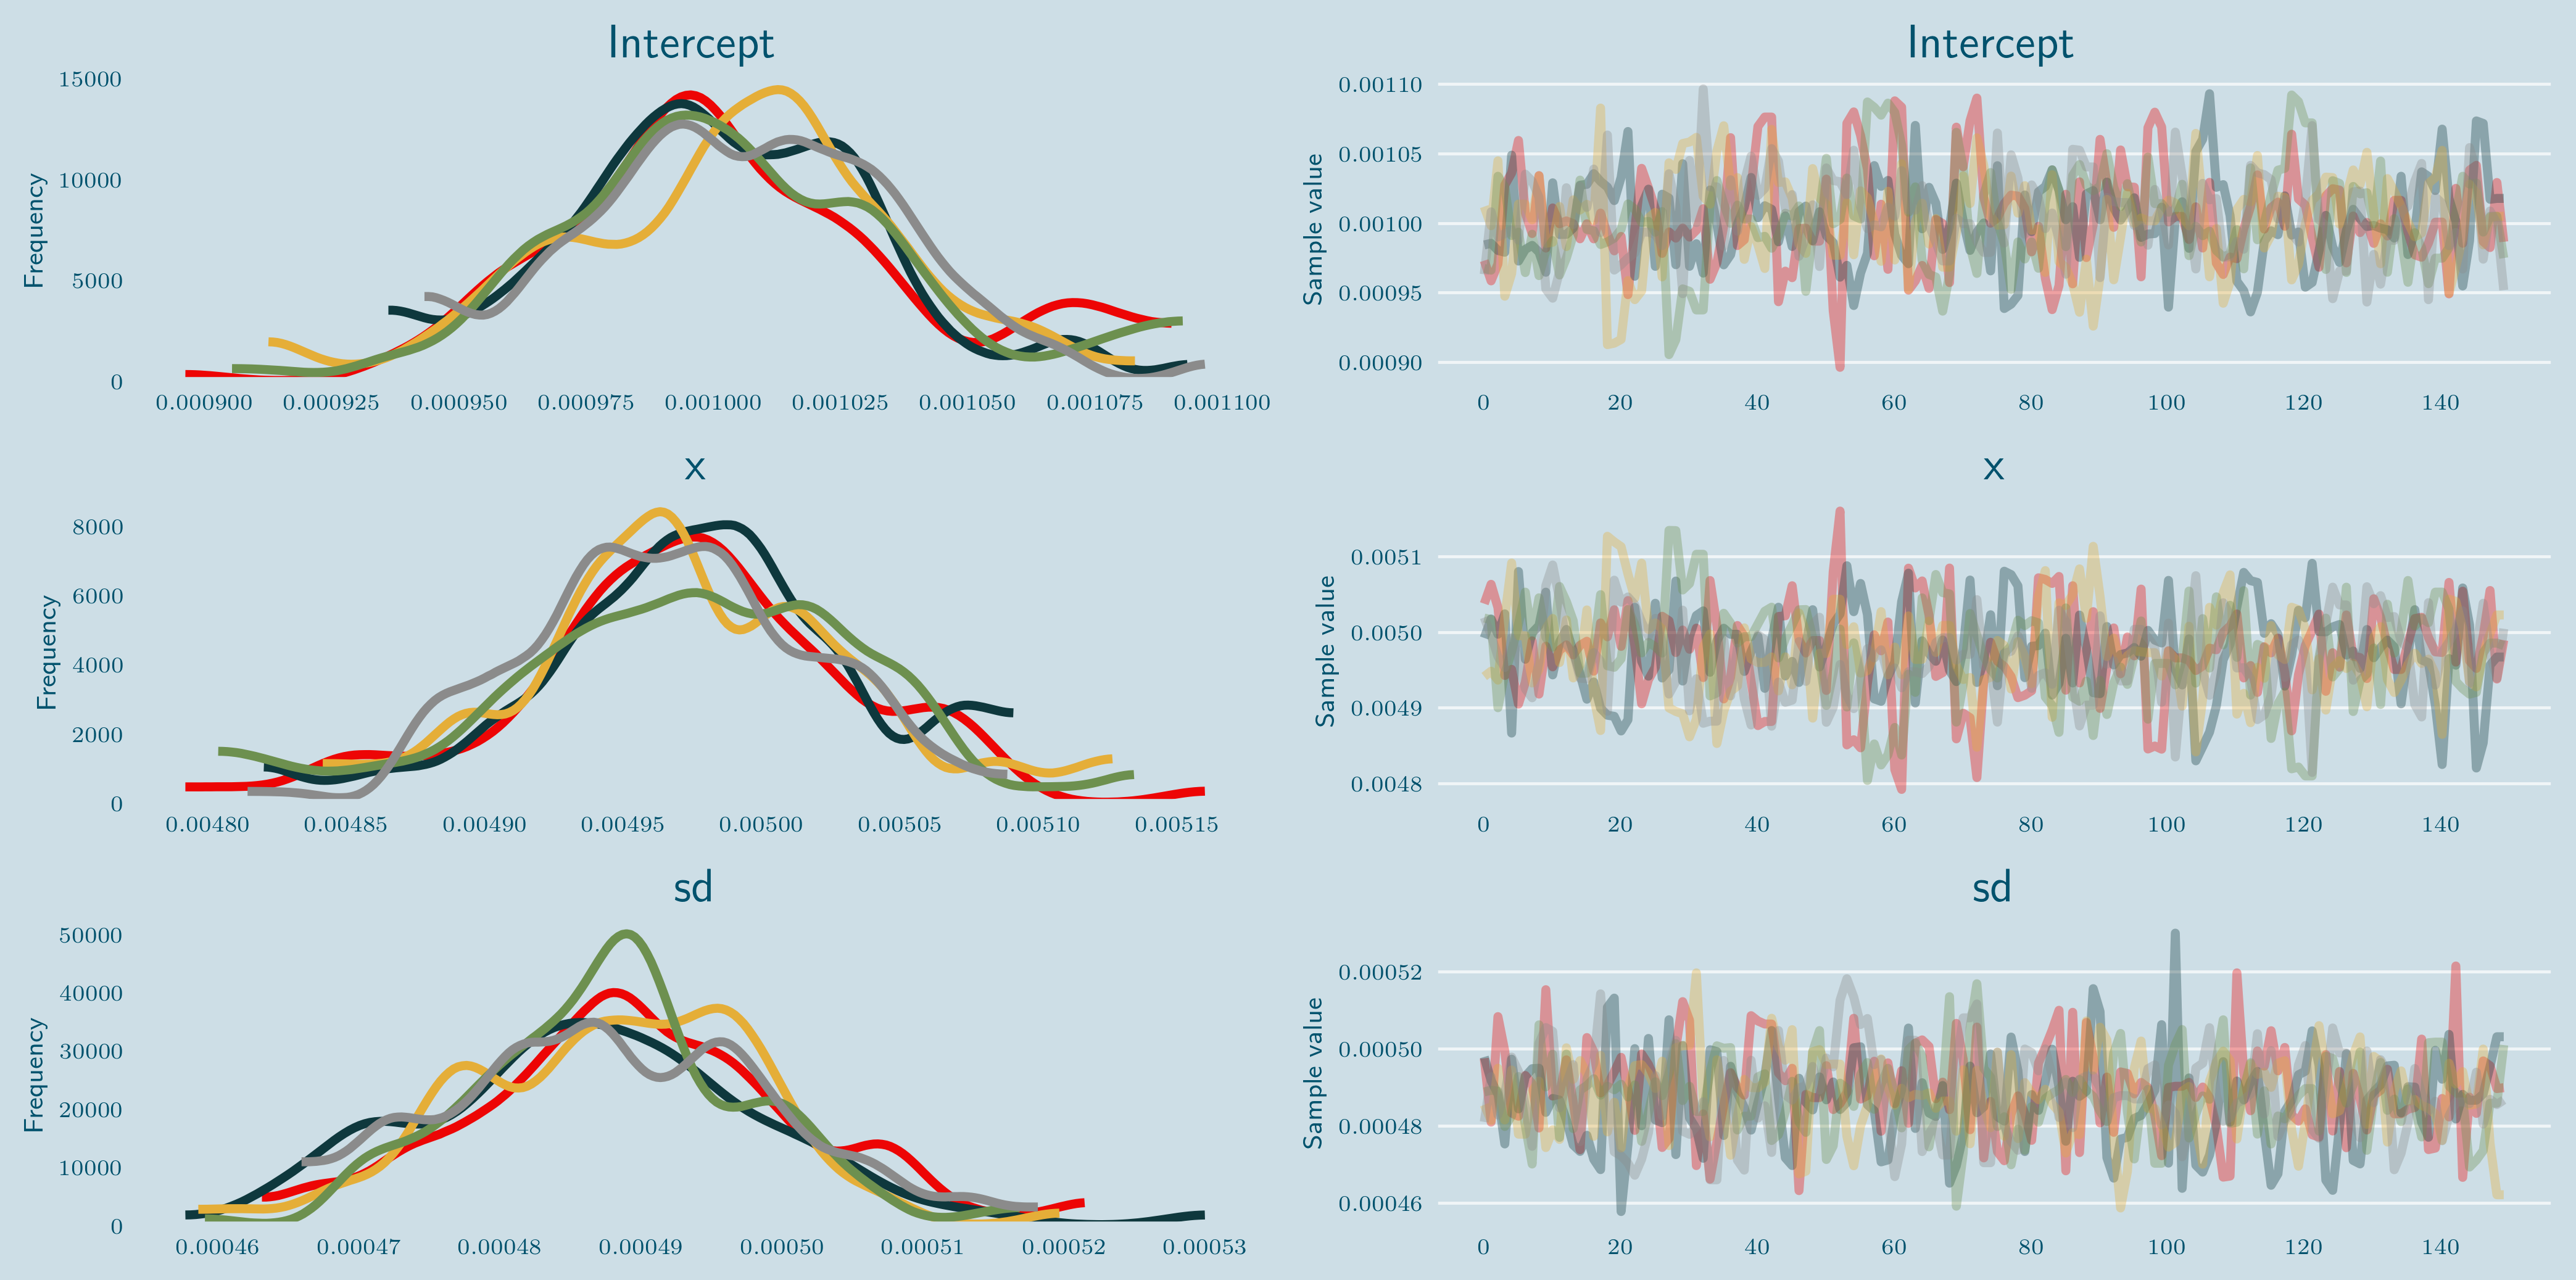

In [112]:
traceplot(trace)
plt.tight_layout();

In [133]:
pm.summary(trace)
# print(trace['Intercept'][0])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,0.001003,0.000032,1.785950e-06,0.000942,0.001072,348.299370,0.998026
x,0.004972,0.000058,3.230153e-06,0.004859,0.005091,300.064597,0.999090
sd,0.000488,0.000011,4.496378e-07,0.000467,0.000508,560.380442,1.001576


In [135]:
print(trace[1]['x'])

0.004995868463127137


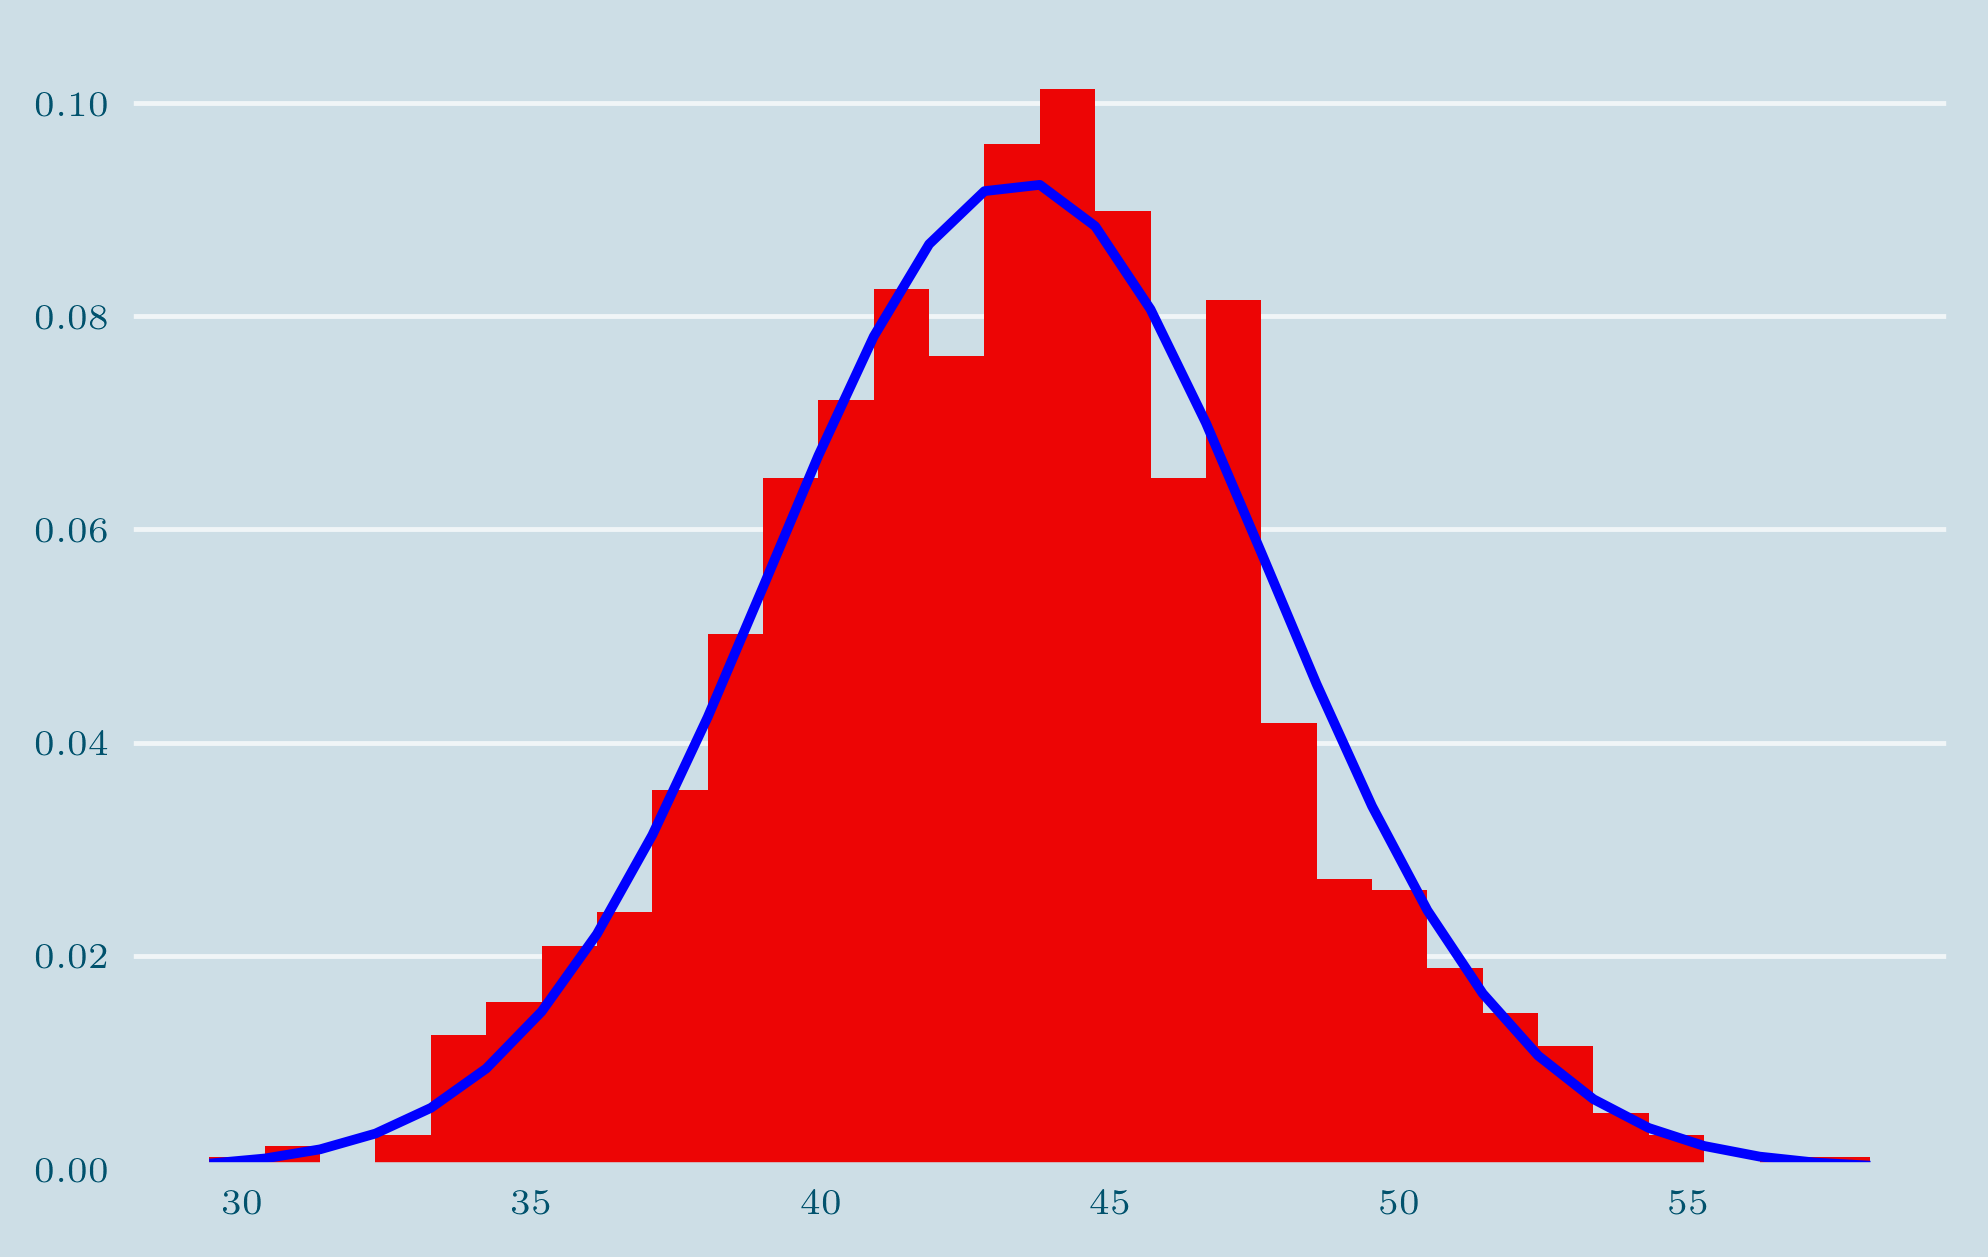

In [28]:
mu, sigma = 43.418, 4.305 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *  np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='b')